## **Importing the Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import pickle

## **Data Preprocessing**

#### **Reading the dataset**

In [2]:
dataset=pd.read_csv("cyberbullying_tweets.csv")           

In [3]:
dataset=dataset[dataset['cyberbullying_type']!='other_cyberbullying']

In [4]:
dataset.shape

(39869, 2)

In [5]:
dataset.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


#### **Data Visualizations**

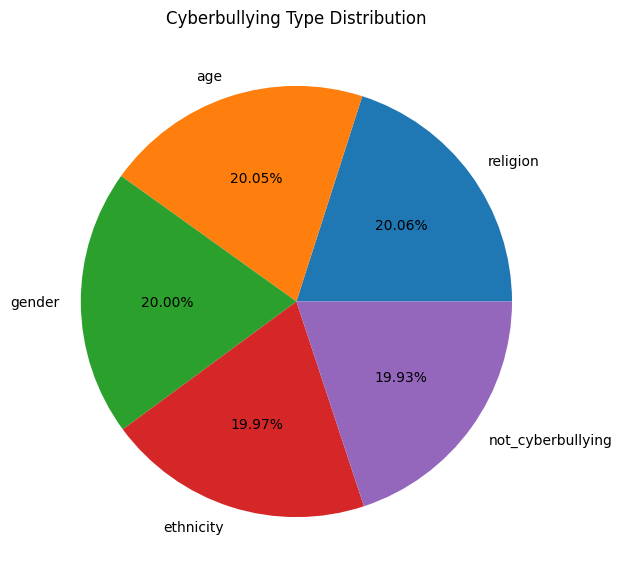

In [6]:
import matplotlib.pyplot as plt

# Count cyberbullying types
counts = dataset['cyberbullying_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%')
plt.title('Cyberbullying Type Distribution')
plt.show()


#### **Encoding 'cyberbullying_type' column to provide shield**

In [7]:
# Encoding the classes with numbers
def change_type(data):
    shields={
        'not_cyberbullying':0,
        'age':1,
        'gender':2,
        'religion':3,
        'ethnicity':4
    }
    if  data in shields.keys():
        return shields[data]
    return 5

In [8]:
dataset["shield"]=dataset["cyberbullying_type"].apply(change_type)

In [9]:
dataset.head()

,tweet_text,cyberbullying_type,shield
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0


## **Text Preprocessing using Natural Language Processing(NLP)**

In [10]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arupp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arupp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def text_preprocessing(text):
    text = text.lower() #convert to lower case
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove punctuations
    tokens = word_tokenize(text) #tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [x for x in tokens if x not in stop_words] #remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(x) for x in tokens] #stemming
    return ' '.join(tokens)

**Before preprocessing**

In [12]:
dataset["tweet_text"][0]

'In other words #katandandre, your food was crapilicious! #mkr'

**After preprocessing**

In [13]:
dataset['preprocessed_tweets'] = dataset['tweet_text'].apply(text_preprocessing)

In [14]:
dataset['preprocessed_tweets'][0]

'word katandandr food crapilici mkr'

In [15]:
dataset.head()

,tweet_text,cyberbullying_type,shield,preprocessed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,xochitlsuckkk classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,jasongio meh p thank head concern anoth angri ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,rudhoeenglish isi account pretend kurdish acco...


## **Model Training**

#### **Dividing into input and output**

In [16]:
X=dataset['preprocessed_tweets']
y=dataset['shield']

In [17]:
X

0                       word katandandr food crapilici mkr
1        aussietv white mkr theblock imacelebrityau tod...
2             xochitlsuckkk classi whore red velvet cupcak
3        jasongio meh p thank head concern anoth angri ...
4        rudhoeenglish isi account pretend kurdish acco...
                               ...                        
47687    black ppl arent expect anyth depend anyth yet ...
47688    turner withhold disappoint turner call court “...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel your nigger fuck unfol...
47691    bro u got ta chill rt chillshrammi dog fuck kp...
Name: preprocessed_tweets, Length: 39869, dtype: object

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
47687    4
47688    4
47689    4
47690    4
47691    4
Name: shield, Length: 39869, dtype: int64

**Creating Word cloud for input data**

In [19]:
def generate_wordcloud(text):
    text = ' '.join(X)
    wordcloud = WordCloud(width=500, height=500, background_color="white")
    wordcloud.generate(text)
    plt.figure(figsize=(5,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

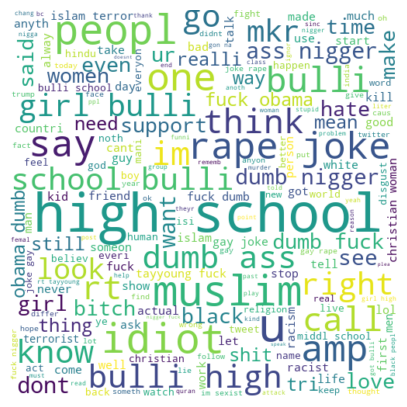

In [20]:
generate_wordcloud(X)

#### **Train Test Split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

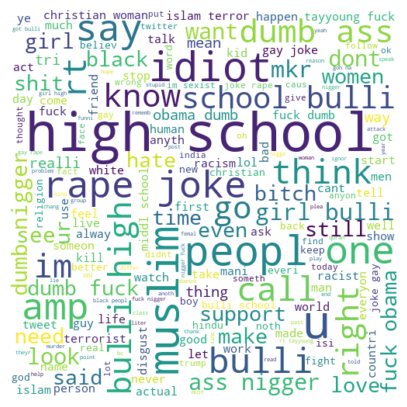

In [22]:
generate_wordcloud(X_train)

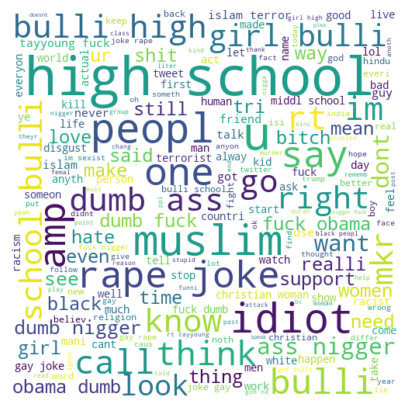

In [23]:
generate_wordcloud(X_test)

#### **Converting the text to vectors using Tf-Idf**

In [24]:
vectorizer = TfidfVectorizer()

In [31]:
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [33]:
X_train_tfidf.shape

(31895, 42656)

In [34]:
X_test_tfidf.shape

(7974, 42656)

## **Model Building**

#### **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# created the random forest model which can go upto a maximum depth of 100.
rf_clf = RandomForestClassifier(max_depth=100, random_state=0)


In [38]:
rf_clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [39]:
y_pred_rf=rf_clf.predict(X_test_tfidf)

**Testing**

In [40]:
from sklearn.metrics import accuracy_score

acc_rf=accuracy_score(y_test, y_pred_rf)

print(f"Accuracy Score: {acc_rf * 100:.2f} %")

Accuracy Score: 93.06 %


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1634
           1       0.97      0.98      0.98      1599
           2       0.96      0.83      0.89      1541
           3       0.95      0.95      0.95      1584
           4       0.99      0.98      0.99      1616

    accuracy                           0.93      7974
   macro avg       0.94      0.93      0.93      7974
weighted avg       0.93      0.93      0.93      7974



#### **Naive Bayes**

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
nb_clf=MultinomialNB()

In [44]:
nb_clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [45]:
y_pred_nb=nb_clf.predict(X_test_tfidf)

**Testing**

In [46]:
from sklearn.metrics import accuracy_score

acc_nb=accuracy_score(y_test, y_pred_nb)

print(f"Accuracy Score: {acc_nb * 100:.2f} %")

Accuracy Score: 83.46 %


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59      1634
           1       0.76      0.99      0.86      1599
           2       0.86      0.87      0.87      1541
           3       0.82      0.97      0.89      1584
           4       0.89      0.92      0.90      1616

    accuracy                           0.83      7974
   macro avg       0.85      0.84      0.82      7974
weighted avg       0.85      0.83      0.82      7974



#### **Accuracy Comparison**

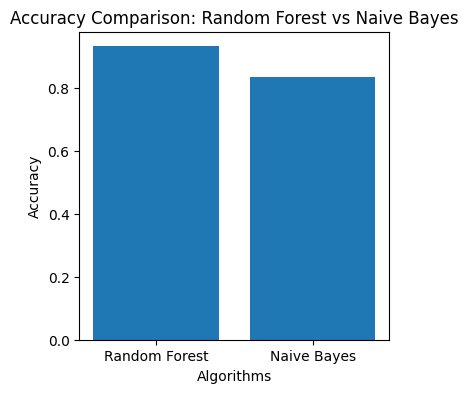

In [48]:
plt.figure(figsize=(4, 4))
plt.bar(['Random Forest', 'Naive Bayes'], [acc_rf, acc_nb])
plt.title("Accuracy Comparison: Random Forest vs Naive Bayes")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## **Conclusion**

By comparing we can conclude that the **Random Forest Classifer** performs well in the dataset.

## **Saving the Model**

In [49]:
with open('./saved_models/rf_clf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

In [50]:
with open('./saved_models/tfidf.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)